<a href="https://colab.research.google.com/github/AKHIRANANDHINI/Application-of-Data-Mining/blob/main/labtest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original DataFrame:
   feature1  feature2   feature3
0  0.496714  2.169259  11.073362
1 -0.138264  4.158709  11.682354
2  0.647689  4.314571  13.249154
3  1.523030  3.395445  13.161406
4 -0.234153  4.677429   5.866992

Outliers identified using Z-score (feature1):
    feature1  feature2   feature3
5        5.0  5.808102   7.186525
15      -4.0  5.603095  12.276908


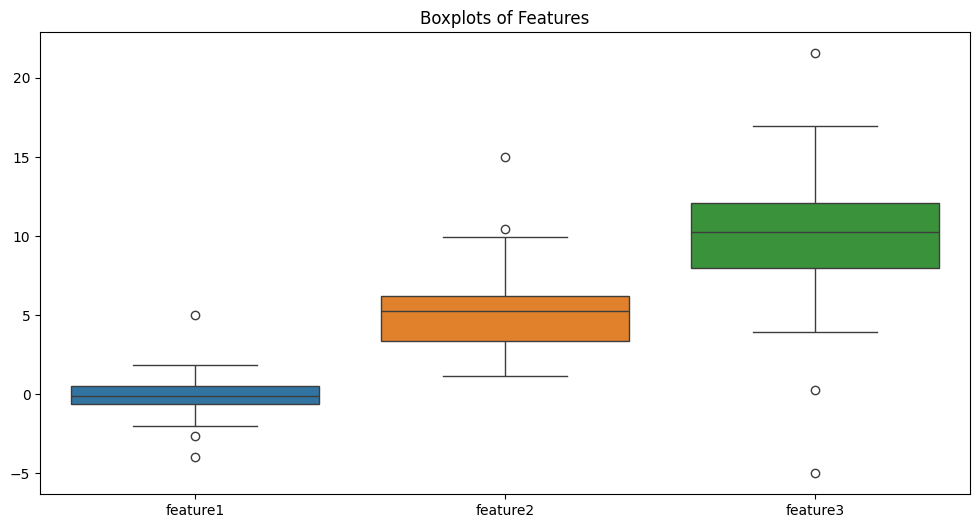


Feature2 after capping:
   feature2  feature2_capped
0  2.169259         2.169259
1  4.158709         4.158709
2  4.314571         4.314571
3  3.395445         3.395445
4  4.677429         4.677429
5  5.808102         5.808102
6  8.772372         8.772372
7  5.349156         5.349156
8  5.515101         5.515101
9  4.851108         4.851108

DataFrame after removing outliers in feature3:
   feature1  feature2   feature3  feature2_capped
0  0.496714  2.169259  11.073362         2.169259
1 -0.138264  4.158709  11.682354         4.158709
2  0.647689  4.314571  13.249154         4.314571
3  1.523030  3.395445  13.161406         3.395445
4 -0.234153  4.677429   5.866992         4.677429

Feature1 after imputation (median):
   feature1  feature1_imputed
0  0.496714          0.496714
1 -0.138264         -0.138264
2  0.647689          0.647689
3  1.523030          1.523030
4 -0.234153         -0.234153
5  5.000000         -0.093829
6  1.579213          1.579213
7  0.767435          0.767435
8

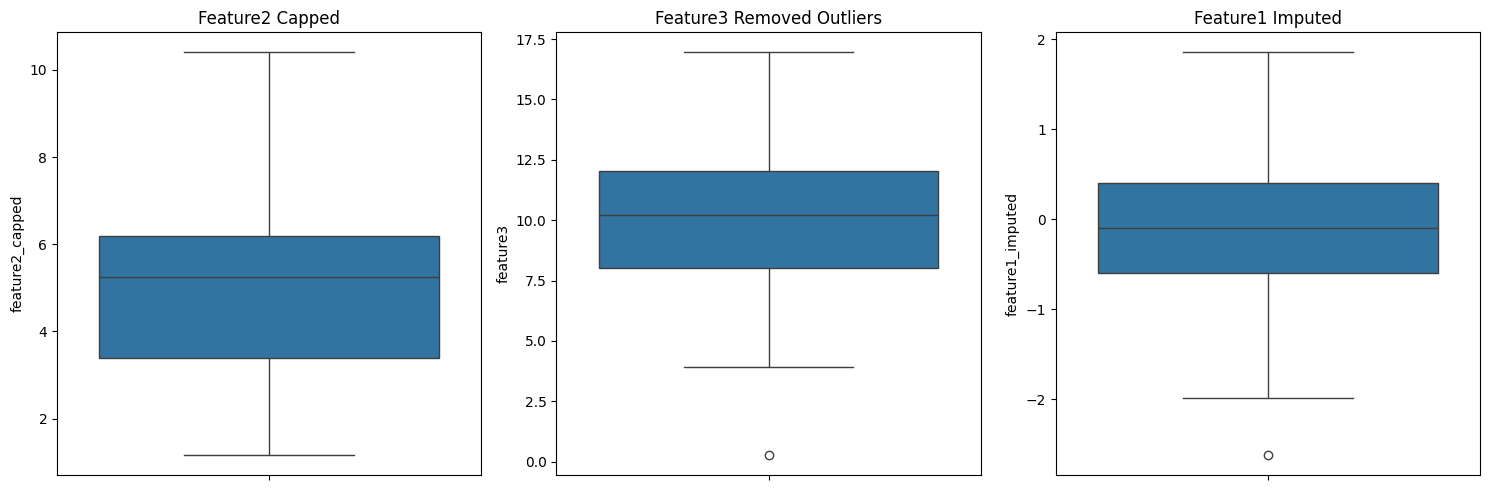

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
data = {
    'feature1': np.random.normal(0, 1, 100),
    'feature2': np.random.normal(5, 2, 100),
    'feature3': np.random.normal(10, 3, 100)
}
df = pd.DataFrame(data)
df.loc[5, 'feature1'] = 5
df.loc[15, 'feature1'] = -4
df.loc[90, 'feature2'] = 15
df.loc[80, 'feature3'] = -5
print("Original DataFrame:")
print(df.head())
z_scores = (df['feature1'] - df['feature1'].mean()) / df['feature1'].std()
outliers_z = df[abs(z_scores) > 3]
print("\nOutliers identified using Z-score (feature1):")
print(outliers_z)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplots of Features")
plt.show()
q1 = df['feature2'].quantile(0.25)
q3 = df['feature2'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['feature2_capped'] = df['feature2'].clip(lower_bound, upper_bound)
print("\nFeature2 after capping:")
print(df[['feature2', 'feature2_capped']].head(10))
mean_f3 = df['feature3'].mean()
std_f3 = df['feature3'].std()
df_removed = df[abs(df['feature3'] - mean_f3) <= 3 * std_f3].copy()
print("\nDataFrame after removing outliers in feature3:")
print(df_removed.head())
median_f1 = df['feature1'].median()
df['feature1_imputed'] = df['feature1'].copy()
df.loc[abs(z_scores) > 3, 'feature1_imputed'] = median_f1
print("\nFeature1 after imputation (median):")
print(df[['feature1', 'feature1_imputed']].head(10))
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['feature2_capped'])
plt.title("Feature2 Capped")
plt.subplot(1, 3, 2)
sns.boxplot(y=df_removed['feature3'])
plt.title("Feature3 Removed Outliers")
plt.subplot(1, 3, 3)
sns.boxplot(y=df['feature1_imputed'])
plt.title("Feature1 Imputed")
plt.tight_layout()
plt.show()
